In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import geopandas as gpd
from mpl_toolkits.basemap import Basemap

In [2]:
# df = pd.read_csv('../../data/external_data/archive/The Climate Change Twitter Dataset.csv')

In [3]:
# df.columns

Index(['created_at', 'id', 'lng', 'lat', 'topic', 'sentiment', 'stance',
       'gender', 'temperature_avg', 'aggressiveness'],
      dtype='object')

In [4]:
# drop if long and lat are na
# df = df.dropna(subset=['lng', 'lat'])

In [5]:
# create mask for new york
# mask = (df['lng'] > -74.25) & (df['lng'] < -73.69) & (df['lat'] > 40.48) & (df['lat'] < 40.92)
# df = df.loc[mask]

In [6]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225737 entries, 1 to 15789242
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   created_at       225737 non-null  object 
 1   id               225737 non-null  int64  
 2   lng              225737 non-null  float64
 3   lat              225737 non-null  float64
 4   topic            225737 non-null  object 
 5   sentiment        225737 non-null  float64
 6   stance           225737 non-null  object 
 7   gender           225737 non-null  object 
 8   temperature_avg  225737 non-null  float64
 9   aggressiveness   225737 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 18.9+ MB


In [7]:
# import Point
# from shapely.geometry import Point

# # create geometry column
# df['geometry'] = df.apply(lambda x: Point((float(x.lng), float(x.lat))), axis=1)

In [8]:
# convert to geodataframe
# df_g = gpd.GeoDataFrame(df, geometry='geometry')

In [93]:
awater = gpd.read_file("../../data/external_data/tl_2020_36_tract10/tl_2020_36_tract10.shp")
counties = ['36005', '36047', '36061', '36081', '36085']
mask = awater.GEOID10.str[:5].isin(counties)
awater = awater[mask]

In [94]:
awater

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,36,085,024800,36085024800,248,Census Tract,G5020,S,1649555,703149,+40.5174031,-074.2433560,"POLYGON ((-74.25817 40.50816, -74.25813 40.508..."
1,36,085,025100,36085025100,251,Census Tract,G5020,S,1171699,0,+40.6180182,-074.1460350,"POLYGON ((-74.15356 40.61275, -74.15314 40.614..."
2,36,085,027301,36085027301,273.01,Census Tract,G5020,S,3038370,1271,+40.5996828,-074.1521427,"POLYGON ((-74.16329 40.60168, -74.16248 40.604..."
3,36,085,027302,36085027302,273.02,Census Tract,G5020,S,1021147,0,+40.5955280,-074.1387179,"POLYGON ((-74.14567 40.58997, -74.14563 40.590..."
4,36,085,030301,36085030301,303.01,Census Tract,G5020,S,719319,0,+40.6189198,-074.1561200,"POLYGON ((-74.16848 40.62156, -74.16814 40.622..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4836,36,081,107202,36081107202,1072.02,Census Tract,G5020,S,7091507,17204004,+40.6252538,-073.8137646,"POLYGON ((-73.85352 40.58659, -73.84985 40.588..."
4837,36,081,012500,36081012500,125,Census Tract,G5020,S,163049,0,+40.7709267,-073.9156695,"POLYGON ((-73.91988 40.77223, -73.91977 40.772..."
4838,36,081,029400,36081029400,294,Census Tract,G5020,S,1064504,0,+40.6713239,-073.7810654,"POLYGON ((-73.78916 40.66834, -73.78883 40.669..."
4839,36,081,061301,36081061301,613.01,Census Tract,G5020,S,712703,0,+40.7089649,-073.8931848,"POLYGON ((-73.90060 40.71270, -73.90018 40.712..."


In [92]:
df_g = pd.read_csv('../../data/processed_data/climate_change_tweets.csv')
df_g = gpd.GeoDataFrame(df_g, geometry='geometry')

TypeError: Input must be valid geometry objects: POINT (-73.9495823 40.6501038)

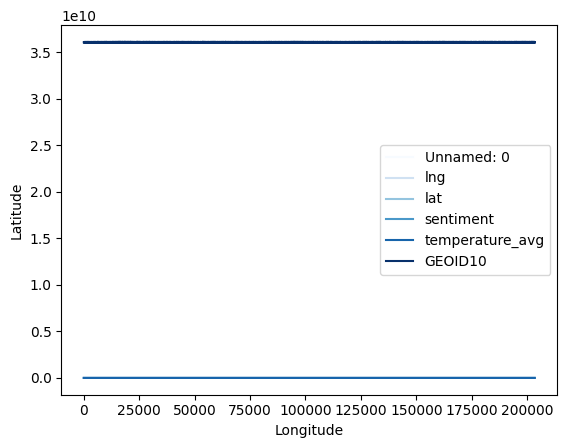

In [91]:
# set figure size
# fig, ax = plt.subplots(figsize=(10,10))
m = Basemap(llcrnrlon=-79, llcrnrlat=40.49, urcrnrlon=-71.96, urcrnrlat=45.01,
            resolution='i', projection='tmerc', lat_0=40.5, lon_0=-74.25)
df_g.plot(ax=m.ax, column='sentiment', cmap='Blues', legend=True, markersize=1)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [10]:
df

,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness,geometry
1,2006-07-23 21:52:30+00:00,13275,-73.949582,40.650104,Weather Extremes,0.575777,neutral,undefined,-1.114768,aggressive,POINT (-73.94958 40.65010)
12,2007-01-06 17:36:51+00:00,2266613,-73.949582,40.650104,Weather Extremes,-0.567821,neutral,male,15.600876,aggressive,POINT (-73.94958 40.65010)
31,2007-01-17 02:18:13+00:00,3081573,-73.949582,40.650104,Weather Extremes,0.026214,neutral,male,-2.851010,not aggressive,POINT (-73.94958 40.65010)
71,2007-02-02 18:15:51+00:00,5144253,-73.949582,40.650104,Weather Extremes,0.159730,neutral,male,1.846384,not aggressive,POINT (-73.94958 40.65010)
205,2007-03-16 19:11:10+00:00,8686211,-74.005970,40.714270,Weather Extremes,-0.375817,neutral,female,-2.610953,not aggressive,POINT (-74.00597 40.71427)
...,...,...,...,...,...,...,...,...,...,...,...
15788873,2019-09-30 20:01:08+00:00,1178761718408896512,-74.006015,40.712728,Importance of Human Intervantion,0.117504,believer,female,1.438618,aggressive,POINT (-74.00602 40.71273)
15788920,2019-09-30 20:47:03+00:00,1178773273737252864,-74.005970,40.714270,Global stance,-0.047954,believer,female,1.438618,not aggressive,POINT (-74.00597 40.71427)
15788960,2019-09-30 21:22:47+00:00,1178782266329325568,-74.077640,40.728160,Global stance,-0.685905,believer,male,1.438618,not aggressive,POINT (-74.07764 40.72816)
15789057,2019-09-30 23:00:04+00:00,1178806748460830720,-73.966250,40.783430,Global stance,0.115604,believer,male,0.769352,not aggressive,POINT (-73.96625 40.78343)


In [86]:
awater = gpd.read_file("../../data/external_data/tl_2020_36_tract10/tl_2020_36_tract10.shp")
counties = ['36005', '36047', '36061', '36081', '36085']
mask = awater.GEOID10.str[:5].isin(counties)
awater = awater[mask]

In [18]:
awater = awater[['GEOID10', 'geometry']].reset_index(drop=True)

In [29]:
gids = pd.DataFrame(index=df_g.index, columns=['GEOID10'])

,GEOID10
1,NaN
12,NaN
31,NaN
71,NaN
205,NaN
...,...
15788873,NaN
15788920,NaN
15788960,NaN
15789057,NaN


In [36]:
# use tqdm to show progress
import tqdm.notebook as tqdm

# map points in df to polygons in awater and vectorize it
gids = pd.DataFrame(index=df_g.index, columns=['GEOID10'])
for i in tqdm.tqdm(range(len(awater))):
    # print(i)
    poly = awater.iloc[i]['geometry']
    mask = poly.contains(df_g['geometry'])
    gids.loc[mask, 'GEOID10'] = awater.iloc[i]['GEOID10']

# gids = []
# for i in tqdm.tqdm(range(len(df_g))):
#     if i%1000 == 0:
#         print(i)
#     point = df_g.iloc[i]['geometry']
#     for j in range(len(awater)):
#         poly = awater.iloc[j]['geometry']
#         if point.within(poly):
#             gids.append(awater.iloc[j]['GEOID10'])
#             break

  0%|          | 0/2168 [00:00<?, ?it/s]

In [37]:
df_g = df_g.join(gids)
df_g

,created_at,id,lng,lat,topic,sentiment,stance,gender,temperature_avg,aggressiveness,geometry,GEOID10
1,2006-07-23 21:52:30+00:00,13275,-73.949582,40.650104,Weather Extremes,0.575777,neutral,undefined,-1.114768,aggressive,POINT (-73.94958 40.65010),36047082400
12,2007-01-06 17:36:51+00:00,2266613,-73.949582,40.650104,Weather Extremes,-0.567821,neutral,male,15.600876,aggressive,POINT (-73.94958 40.65010),36047082400
31,2007-01-17 02:18:13+00:00,3081573,-73.949582,40.650104,Weather Extremes,0.026214,neutral,male,-2.851010,not aggressive,POINT (-73.94958 40.65010),36047082400
71,2007-02-02 18:15:51+00:00,5144253,-73.949582,40.650104,Weather Extremes,0.159730,neutral,male,1.846384,not aggressive,POINT (-73.94958 40.65010),36047082400
205,2007-03-16 19:11:10+00:00,8686211,-74.005970,40.714270,Weather Extremes,-0.375817,neutral,female,-2.610953,not aggressive,POINT (-74.00597 40.71427),36061003100
...,...,...,...,...,...,...,...,...,...,...,...,...
15788873,2019-09-30 20:01:08+00:00,1178761718408896512,-74.006015,40.712728,Importance of Human Intervantion,0.117504,believer,female,1.438618,aggressive,POINT (-74.00602 40.71273),36061003100
15788920,2019-09-30 20:47:03+00:00,1178773273737252864,-74.005970,40.714270,Global stance,-0.047954,believer,female,1.438618,not aggressive,POINT (-74.00597 40.71427),36061003100
15788960,2019-09-30 21:22:47+00:00,1178782266329325568,-74.077640,40.728160,Global stance,-0.685905,believer,male,1.438618,not aggressive,POINT (-74.07764 40.72816),NaN
15789057,2019-09-30 23:00:04+00:00,1178806748460830720,-73.966250,40.783430,Global stance,0.115604,believer,male,0.769352,not aggressive,POINT (-73.96625 40.78343),36061014300


In [39]:
df_g = df_g.dropna(subset=['GEOID10'])

In [41]:
df_g.columns

Index(['created_at', 'id', 'lng', 'lat', 'topic', 'sentiment', 'stance',
       'gender', 'temperature_avg', 'aggressiveness', 'geometry', 'GEOID10'],
      dtype='object')

In [42]:
# drop columns
del df_g['id']
del df_g['gender']

In [46]:
df_g = df_g.reset_index(drop=True)
df_g.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 203434 entries, 0 to 203433
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   created_at       203434 non-null  object  
 1   lng              203434 non-null  float64 
 2   lat              203434 non-null  float64 
 3   topic            203434 non-null  object  
 4   sentiment        203434 non-null  float64 
 5   stance           203434 non-null  object  
 6   temperature_avg  203434 non-null  float64 
 7   aggressiveness   203434 non-null  object  
 8   geometry         203434 non-null  geometry
 9   GEOID10          203434 non-null  object  
dtypes: float64(4), geometry(1), object(5)
memory usage: 15.5+ MB


In [45]:
# df_g.to_csv('../../data/processed_data/climate_change_tweets.csv')

In [83]:
df_g = pd.read_csv('../../data/processed_data/climate_change_tweets.csv')

In [84]:
temp = df_g[['GEOID10', 'sentiment']].groupby('GEOID10').mean().reset_index()

In [87]:
temp = pd.merge(awater, temp, on='GEOID10', how='left')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [51]:
# temp.fillna(0, inplace=True)

In [ ]:
# set figure size
# fig, ax = plt.subplots(figsize=(10,10))
m = Basemap(llcrnrlon=-79, llcrnrlat=40.49, urcrnrlon=-71.96, urcrnrlat=45.01,
            resolution='i', projection='tmerc', lat_0=40.5, lon_0=-74.25)

# use multicolor legend
temp.plot(ax=m.ax, column='sentiment', cmap='seismic', legend=True, markersize=1)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [80]:
merged = pd.read_csv('../../data/processed_data/data_nyc.csv')
merged.GEOID = merged.GEOID.astype(str).str[:11]
merged_ = pd.merge(merged, temp, left_on='GEOID', right_on='GEOID10', how='left')

In [82]:
merged_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2167
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   GEOID                                   2168 non-null   object  
 1   mean_percent_tree_cover                 2138 non-null   float64 
 2   tree_gap                                2138 non-null   float64 
 3   surface_temp                            2138 non-null   float64 
 4   income_percent                          2138 non-null   float64 
 5   income_group                            2138 non-null   float64 
 6   pop_dens_group                          2138 non-null   float64 
 7   GEOID10_x                               2168 non-null   int64   
 8   ALAND10                                 2168 non-null   int64   
 9   AWATER10                                2168 non-null   int64   
 10  geometry_x                              2168 non

In [95]:
merged

,GEOID,mean_percent_tree_cover,tree_gap,surface_temp,income_percent,income_group,pop_dens_group,GEOID10_x,ALAND10,AWATER10,...,high_speed_street_bordered_tree_buffer,percent_residents_near_park,percent_pm10_removed_trees,percent_tree_view,percent_greenery_walkable_streets,NID,DwIndW,DwNIndW,DwAvgW2,DwNAvgW2
0,36085024800,0.258494,0.255940,28.773062,34044.307692,2.403846,2.673077,36085024800,1649555,703149,...,33.253333,36.190000,0.436835,99.890000,32.786667,13.212394,1.200085,0.444241,1.241845,0.523493
1,36085025100,0.157915,0.229124,29.317413,38426.911765,3.000000,2.750000,36085025100,1171699,0,...,41.919999,58.589999,0.360718,99.826667,35.063333,12.968293,1.208340,0.449466,1.198735,0.498517
2,36085027301,0.173566,0.230324,28.408317,37002.142857,2.857143,2.928571,36085027301,3038370,1271,...,42.820001,45.849998,0.617916,99.965000,41.575000,12.105693,1.239017,0.468884,1.093787,0.437715
3,36085027302,0.180818,0.169708,28.013129,31658.096774,2.387097,3.322581,36085027302,1021147,0,...,39.065002,21.205000,0.680886,100.000000,35.410000,23.148132,1.094785,0.377587,1.111978,0.448254
4,36085030301,0.051182,0.124848,30.450329,28667.931034,2.000000,3.689655,36085030301,719319,0,...,28.860000,52.190002,0.211470,99.875000,26.925000,11.588243,1.413678,0.579442,1.423579,0.628780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,nan,NaN,NaN,NaN,NaN,NaN,NaN,36081107202,7091507,17204004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2164,36081012500,0.079528,0.111681,28.606574,35222.000000,3.000000,3.777778,36081012500,163049,0,...,34.035001,100.000000,0.235837,100.000000,17.485000,12.515271,1.076430,0.365968,1.248330,0.527250
2165,36081029400,0.147562,0.154618,30.355713,28493.262295,2.000000,3.426230,36081029400,1064504,0,...,12.733333,89.648333,0.300137,100.000000,28.976667,15.299628,1.132569,0.401504,1.262264,0.535322
2166,36081061301,0.091592,0.122183,29.283751,27688.631579,2.052632,3.736842,36081061301,712703,0,...,5.597500,66.192499,0.190004,97.957500,18.510000,10.740486,1.429846,0.589676,1.559164,0.707331
